In [1]:
import graphviz
def plot_color(graph):
    color = graphviz.Digraph('color', filename='color.gv')
    indexes = {}
    for k,v in graph.nodes.items():
        name = '{} ({})'.format(k, v['node_attr']['color'])
        indexes[k] = name
        color.node(name)
    for edge in graph.edges:
        color.edge(indexes[edge[0]], indexes[edge[1]])
    return color

In [29]:
import easygraph as eg
G1=eg.Graph()
G2=eg.Graph()

In [30]:
# Assign initial colors
hash_table = {'1':1}
for i in range(1,7):
    G1.add_node(i, node_attr={'color':'1'})
    G2.add_node(i, node_attr={'color':'1'})

In [31]:
G1.add_edges([(1,2),(2,3),(3,4),(1,4),(2,4),(1,6),(1,5)])
G2.add_edges([(1,2),(2,3),(3,4),(1,4),(1,3),(1,6),(4,5)])

In [37]:
# Add commas to the color, as a separator
for k,v in G1.nodes.items():
    v['node_attr']['color'] += ','
    #print(k,v['node_attr']['color'])

In [38]:
# Aggregate neighboring colors:
# For each node, visit its neighbors and append their color
for k in G1.nodes.keys():
    value = G1.nodes[k]['node_attr']['color'].split(',')[0]
    #print('node', k, 'color', value)
    for neighbor in G1.neighbors(node=k):
        G1.nodes[neighbor]['node_attr']['color'] += value

In [39]:
# Hash aggregated colors (update hash table)
for k,v in G1.nodes.items():
    if (v['node_attr']['color'] not in hash_table):
        hash_table[v['node_attr']['color']] = len(hash_table)+1
hash_table

{'1': 1,
 '1,1111': 2,
 '1,111': 3,
 '1,11': 4,
 '1,1': 5,
 '2,3355': 6,
 '3,243': 7,
 '4,33': 8,
 '3,234': 9,
 '5,2': 10}

In [40]:
# Update colors in graph
for k,v in G1.nodes.items():
    v['node_attr']['color'] = str(hash_table[v['node_attr']['color']])
    #print(k,v['node_attr']['color'])

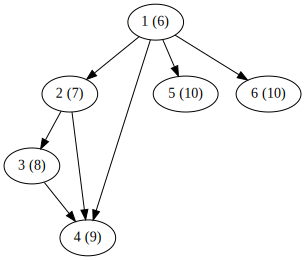

In [41]:
plot_color(G1)

In [24]:
G1.nodes[1]['node_attr']['color'] +=1

In [5]:
for edge in G1.edges:
    print(edge[0], edge[1])

1 2
1 4
1 6
1 5
2 3
2 4
3 4


In [35]:
for k,v in G1.nodes.items():
    #v['node_attr']['color'] = 2
    print(k,v['node_attr']['color'])

1 5
2 4
3 3
4 4
5 2
6 2


In [11]:
for neighbor in G1.neighbors(node=2):
    print(neighbor)

1
3
4


In [16]:
for k in G1.nodes.keys():
    print('node', k)
    for neighbor in G1.neighbors(node=k):
        print(neighbor)

node 1
2
4
6
5
node 2
1
3
4
node 3
2
4
node 4
3
1
2
node 5
1
node 6
1
